In [1]:
import cv2
from skimage import io
from pylab import *
import numpy as np
from skimage import color

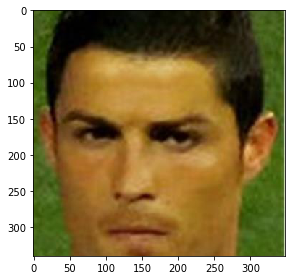

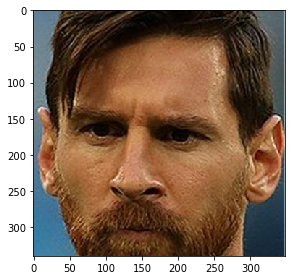

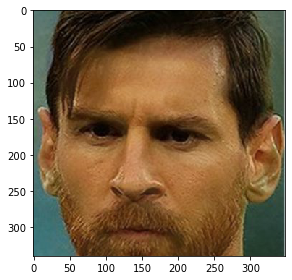

In [4]:
# Blending Two Images
img1= io.imread('images/ronaldo.jpg')
img2= io.imread('images/messi.jpg')

# define alpha & beta
alpha=0.3
beta=0.7

# blend
final_img= cv2.addWeighted(img1, alpha, img2, beta, 0.0)

# show
figure(0)
io.imshow(img1)
figure(1)
io.imshow(img2)
figure(2)
io.imshow(final_img)

In [8]:
img= io.imread('images/parrot.jpg')

#Create a dummy image that stores different contrast and brightness
new_img = np.zeros(img.shape, img.dtype)

# Brightness and contrast parameters
contrast=3.0
bright=2

# change contrast and brightness
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        for z in range(img.shape[2]):
            new_img[x,y,z]= np.clip(contrast*img[x,y,z]+ bright, 0, 255)

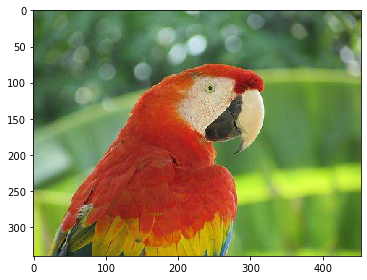

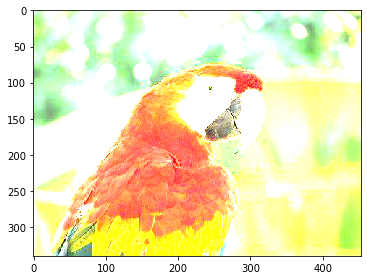

In [9]:
figure(0)
io.imshow(img)
figure(1)
io.imshow(new_img)

<h3>Smoothing</h3>

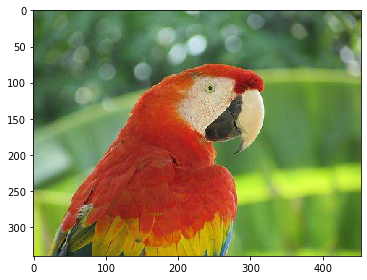

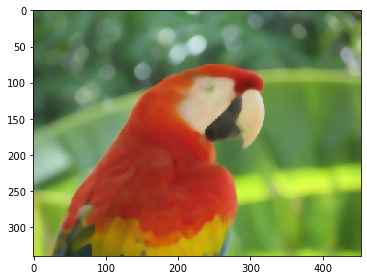

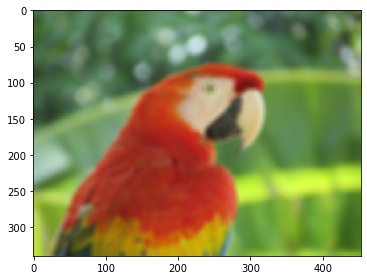

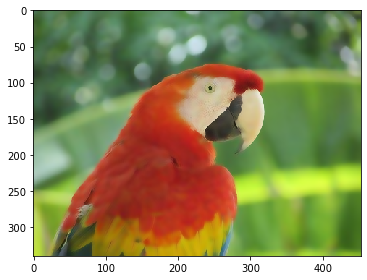

In [10]:
img = io.imread('images/parrot.jpg')
figure(0)
io.imshow(img)

# Median filter
img_median= cv2.medianBlur(img, 9) # kernel size 9*9
figure(1)
io.imshow(img_median)

# Gaussian filter
img_Gauss= cv2.GaussianBlur(img, (9,9), 10) # img, kerner size, standard deviation
figure(2)
io.imshow(img_Gauss)

# Bilateral filter
img_bilateral= cv2.bilateralFilter(img, 9, 100, 75) # img, kernel size, sigma for neighbour color, sigma for neighbour space
figure(3)
io.imshow(img_bilateral)

<h3>Changing shape : Dilation and Erosion </h3>

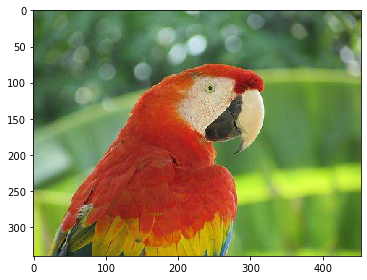

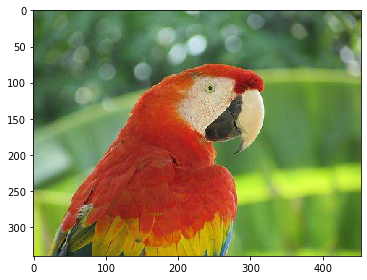

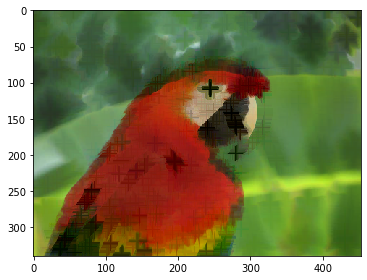

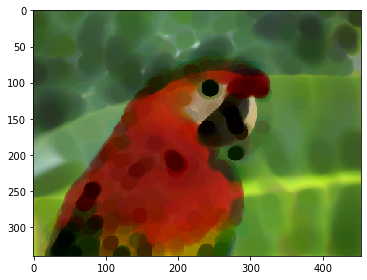

In [27]:
### Erosion
img = io.imread('images/parrot.jpg')

# Define Erosion size
s1= 0
s2= 10
s3= 10

# Define Erosion Type
t1= cv2.MORPH_RECT
t2= cv2.MORPH_CROSS
t3= cv2.MORPH_ELLIPSE

# Define Erosion Template
tmp1= cv2.getStructuringElement(t1, (2*s1+1, 2*s1+1), (s1,s1))
tmp2= cv2.getStructuringElement(t2, (2*s2+1, 2*s2+1), (s2,s2))
tmp3= cv2.getStructuringElement(t3, (2*s3+1, 2*s3+1), (s3,s3))

# apply and save
final1= cv2.erode(img, tmp1)
final2= cv2.erode(img, tmp2)
final3= cv2.erode(img, tmp3)

# show
figure(0)
io.imshow(img)
figure(1)
io.imshow(final1)
figure(2)
io.imshow(final2)
figure(3)
io.imshow(final3)

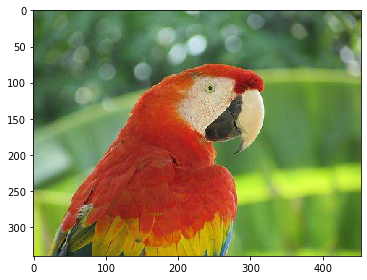

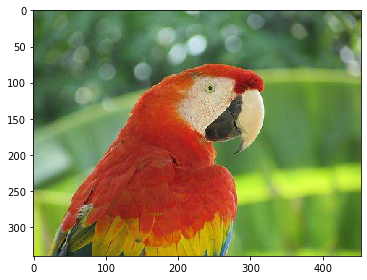

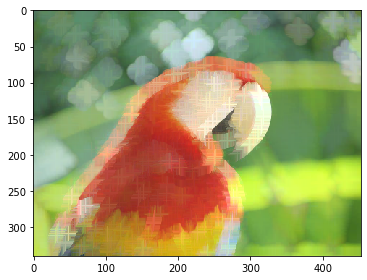

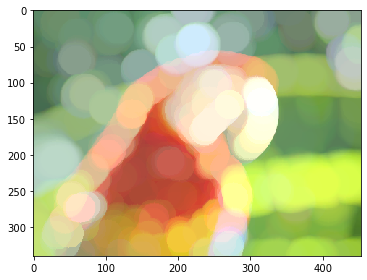

In [28]:
### Dilation
img = io.imread('images/parrot.jpg')

# Define Erosion size
d1= 0
d2= 10
d3= 20

# Define Erosion Type
t1= cv2.MORPH_RECT
t2= cv2.MORPH_CROSS
t3= cv2.MORPH_ELLIPSE

# Define Erosion Template
tmp1= cv2.getStructuringElement(t1, (2*d1+1, 2*d1+1), (d1,d1))
tmp2= cv2.getStructuringElement(t2, (2*d2+1, 2*d2+1), (d2,d2))
tmp3= cv2.getStructuringElement(t3, (2*d3+1, 2*d3+1), (d3,d3))

# apply and save
final1= cv2.dilate(img, tmp1)
final2= cv2.dilate(img, tmp2)
final3= cv2.dilate(img, tmp3)

# show
figure(0)
io.imshow(img)
figure(1)
io.imshow(final1)
figure(2)
io.imshow(final2)
figure(3)
io.imshow(final3)

<h3>Thresholding: for Segmentation</h3>

C:\Users\sara\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


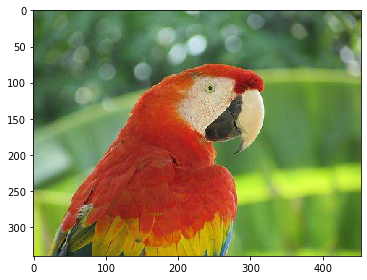

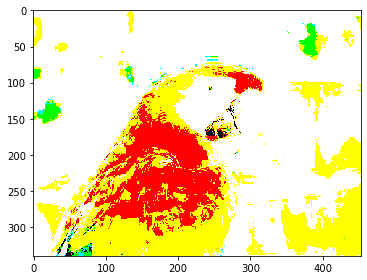

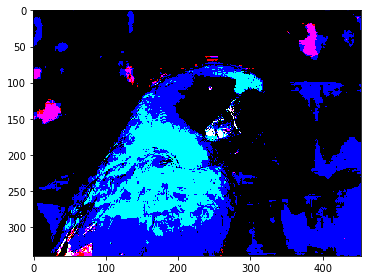

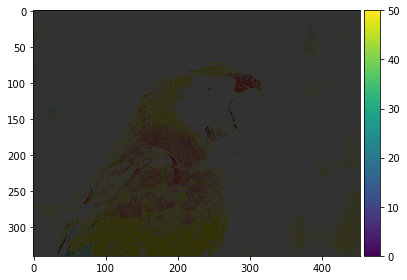

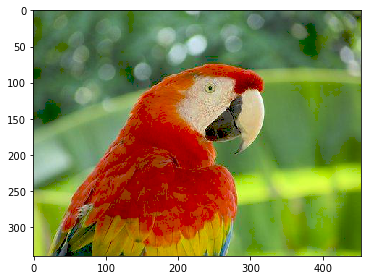

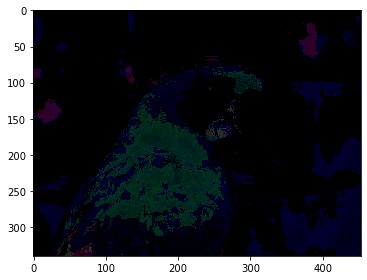

In [36]:
img=io.imread('images/parrot.jpg')

#define threshold type
'''0 - Binary
1 - Binary Inverted
2 - Truncated
3 - Threshold To Zero
4 - Threshold To Zero Inverted'''

#Apply different thresholds and save 
_, img_binary=cv2.threshold(img, 50,255, 0)
_, img_binary_inverted=cv2.threshold(img, 50,255, 1)
_, img_truncated=cv2.threshold(img, 50,255, 2)
_, img_zero=cv2.threshold(img, 50,255, 3)
_, img_zero_inverted=cv2.threshold(img, 50,255, 4)

# show
figure(0)
io.imshow(img)

figure(1)
io.imshow(img_binary)
figure(2)
io.imshow(img_binary_inverted)
figure(3)
io.imshow(img_truncated)
figure(4)
io.imshow(img_zero)
figure(5)
io.imshow(img_zero_inverted)

<h3>Edge Detection using Sobel derivatives</h3>

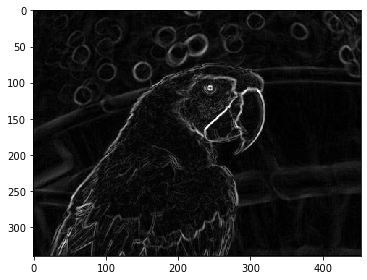

In [37]:
src=io.imread('images/parrot.jpg')

# gaussian blur
src_gaussian=cv2.GaussianBlur(src, (3,3), 0)

# conver to grayscale
gray=cv2.cvtColor(src_gaussian, cv2.COLOR_BGR2GRAY)

### apply Sobel

#Horizontal Sobel Derivation
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT) 
#Vertical Sobel Derivation
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT) 

# get absolute unsighned 8
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# blend the x and y edges
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# show
io.imshow(grad)

<h3>Histogram Equalization</h3>

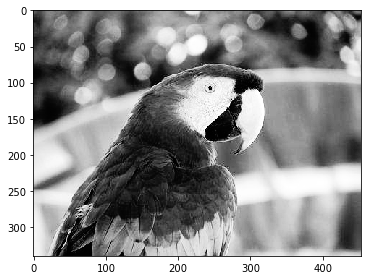

In [38]:
img=io.imread('images/parrot.jpg')

#convert to grayscale
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Histogram Equalization
img_equalized = cv2.equalizeHist(img_gray)

#show
io.imshow(img_equalized)